# CUSTOMER SEGMENTATION USING UNSUPERVISED MACHINE LEARNING

## 1.IMPORT BASIC DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2.LOAD DATASET

In [3]:
df = pd.read_csv(r"C:\Users\user\Music\FINAL_PROJECTS\PROJECT2_CUSTOMER_SEGMENTATION\Final_Project_2 Mall_Customer_Dataset.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3.UNDERSTANDING THE DATASET

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 4.DATA PREPROCESSING

### 4.1.ENCODING GENDER COLUMN

In [10]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
#df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [11]:
df['Gender'].unique()

array([0, 1])

In [14]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
141,142,0,32,75,93
178,179,0,59,93,14
17,18,0,20,21,66
165,166,1,36,85,75
130,131,0,47,71,9


## 5.EXPLORATORY DATA ANALYSIS(EDA)

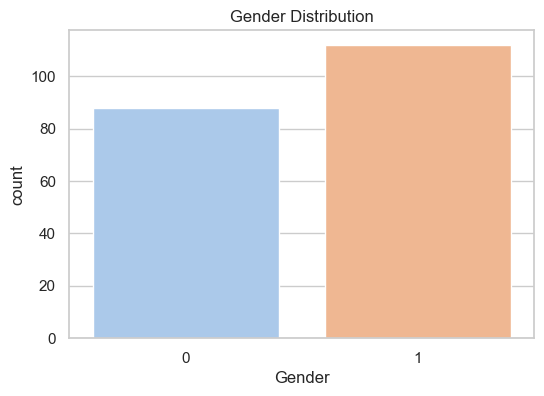

In [45]:
# Style
sns.set(style="whitegrid")

# 1. Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df, palette="pastel")
plt.title("Gender Distribution")
plt.show()

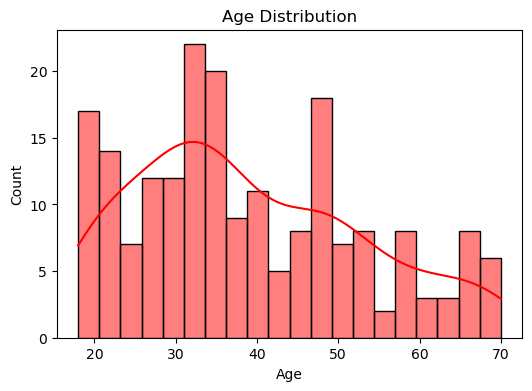

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.savefig("age_distribution")
plt.show()


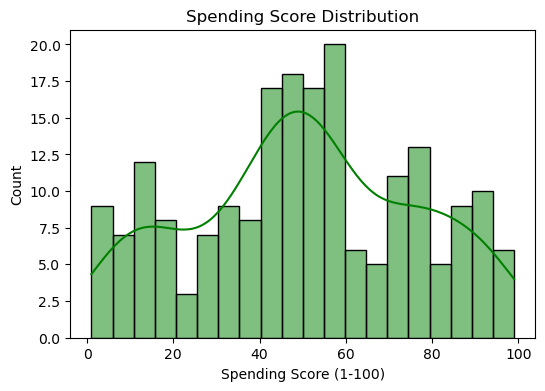

In [30]:
# 4. Spending Score Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, color="green")
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.show()

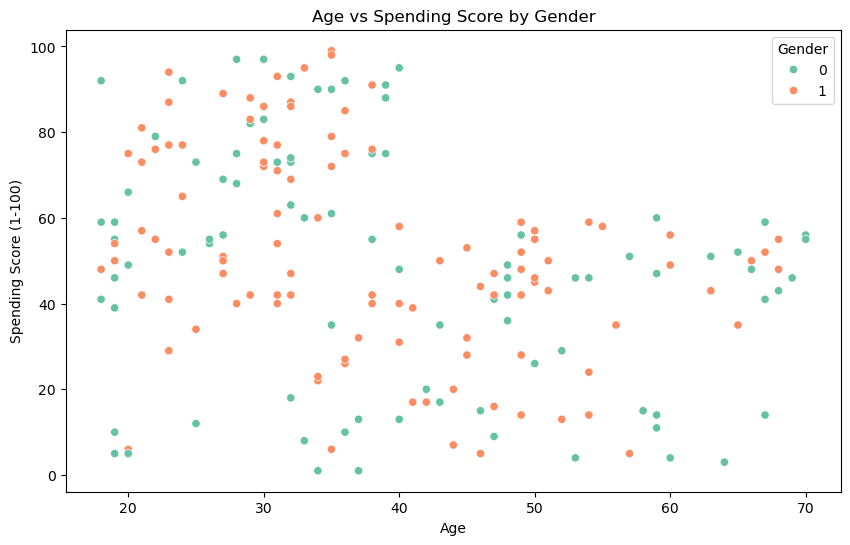

In [32]:
# 5. Age vs Spending Score
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df, palette="Set2")
plt.title("Age vs Spending Score by Gender")
plt.show()

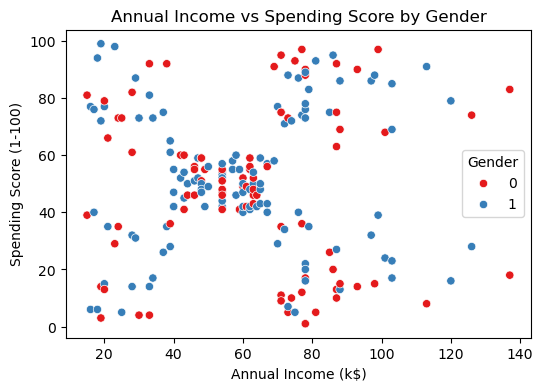

In [33]:
# 6. Income vs Spending Score
plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df, palette="Set1")
plt.title("Annual Income vs Spending Score by Gender")
plt.show()

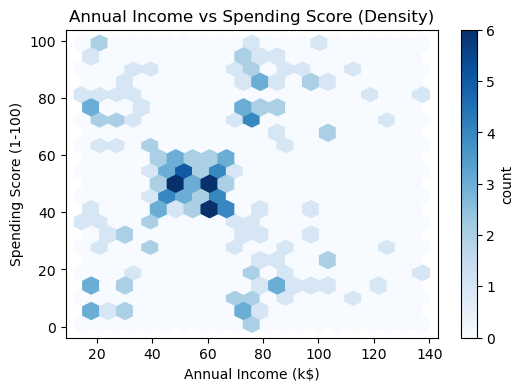

In [42]:
plt.figure(figsize=(6,4))
plt.hexbin(df["Annual Income (k$)"], df["Spending Score (1-100)"], gridsize=20, cmap="Blues")
plt.colorbar(label="count")
plt.title("Annual Income vs Spending Score (Density)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.savefig("income2.png")
plt.show()


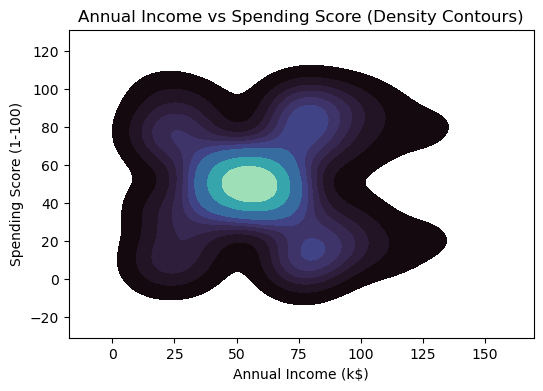

In [37]:
plt.figure(figsize=(6,4))
sns.kdeplot(
    x=df["Annual Income (k$)"], 
    y=df["Spending Score (1-100)"], 
    fill=True, cmap="mako", thresh=0.05
)
plt.title("Annual Income vs Spending Score (Density Contours)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.savefig("income1.png")
plt.show()


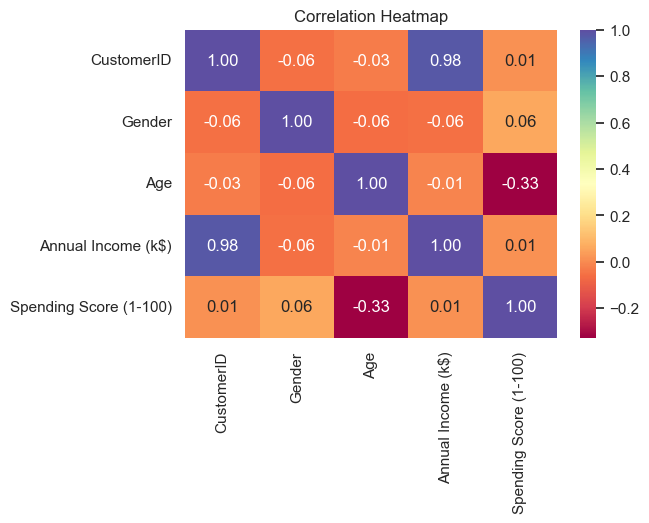

In [49]:
# 7. Correlation Heatmap
plt.figure(figsize=(6,4))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Spectral", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("correlation.png")
plt.show()

In [ ]:
## 5.

In [54]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
print(X_scaled[:5])  

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3. Find best K (Silhouette Method)
K_range = range(2, 11)
sil_scores = []
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

best_k = K_range[sil_scores.index(max(sil_scores))]
print("Best number of clusters(K):", best_k)


Best number of clusters(K): 5


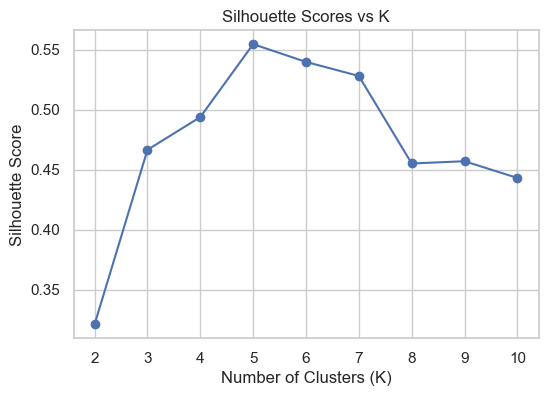

In [59]:

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, 'o-')
plt.title("Silhouette Scores vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


In [60]:
# Choose best K
best_k = K_range[sil_scores.index(max(sil_scores))]
print("Best K by silhouette:", best_k)

Best K by silhouette: 5


In [65]:
# Final KMeans model
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=25)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

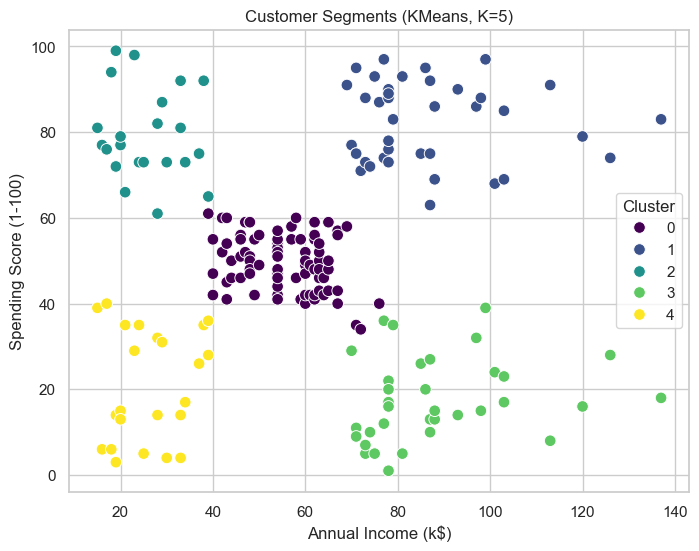

In [67]:
# 5. Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['KMeans_Cluster'], palette="viridis", s=70)
plt.title(f"Customer Segments (KMeans, K={best_k})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()

In [69]:

# 6. Cluster Summary
print("\n--- Cluster Profiles ---")
print(df.groupby("KMeans_Cluster")[['Annual Income (k$)', 'Spending Score (1-100)']].mean())


--- Cluster Profiles ---
                Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043


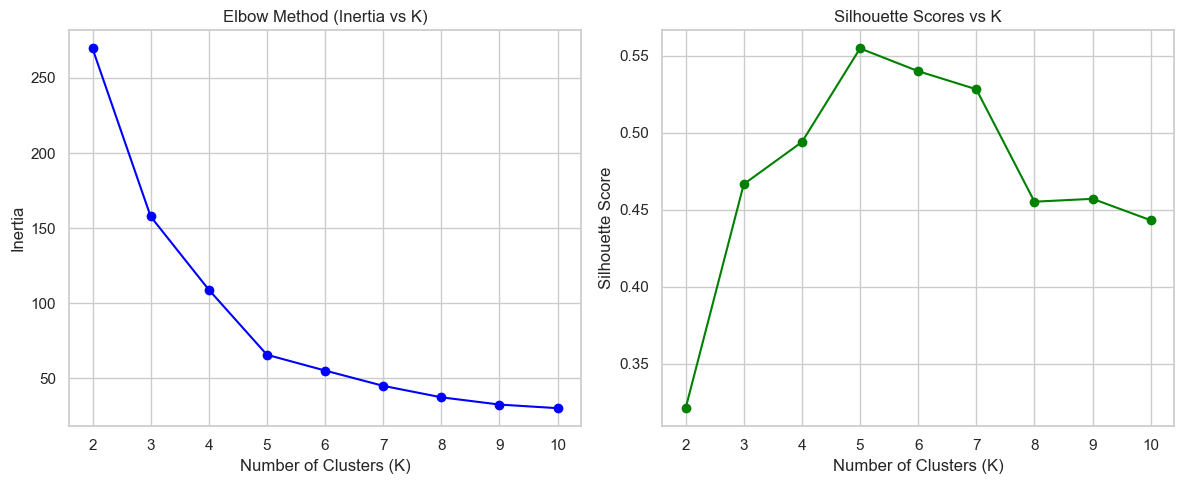

Optimal number of clusters (K): 5


In [71]:
# -------------------------------
# Elbow Method & Silhouette Score (Subplots)
# -------------------------------


# 3. Compute inertia (Elbow) and silhouette scores
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 4. Plot subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Plot
axes[0].plot(K_range, inertias, 'o-', color='blue')
axes[0].set_title("Elbow Method (Inertia vs K)")
axes[0].set_xlabel("Number of Clusters (K)")
axes[0].set_ylabel("Inertia")

# Silhouette Plot
axes[1].plot(K_range, sil_scores, 'o-', color='green')
axes[1].set_title("Silhouette Scores vs K")
axes[1].set_xlabel("Number of Clusters (K)")
axes[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# 5. Best K
best_k = K_range[np.argmax(sil_scores)]
print("Optimal number of clusters (K):", best_k)


In [73]:

from sklearn.cluster import DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

DBSCAN Clusters found: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}


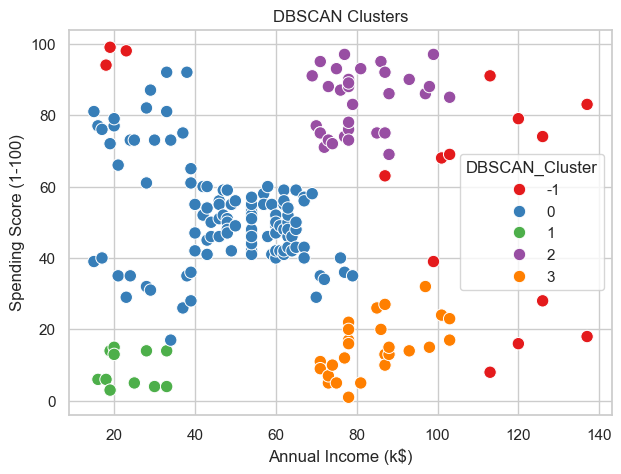

In [79]:
# --- A) DBSCAN ---
dbscan = DBSCAN(eps=0.4, min_samples=5)  
db_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = db_labels

print("DBSCAN Clusters found:", set(db_labels))

plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['DBSCAN_Cluster'], palette="Set1", s=80)
plt.title("DBSCAN Clusters")
plt.show()


In [81]:

# Evaluation (if more than 1 cluster formed)
if len(set(db_labels)) > 1 and -1 not in set(db_labels):
    print("DBSCAN Silhouette Score:", silhouette_score(X_scaled, db_labels))
    print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(X_scaled, db_labels))

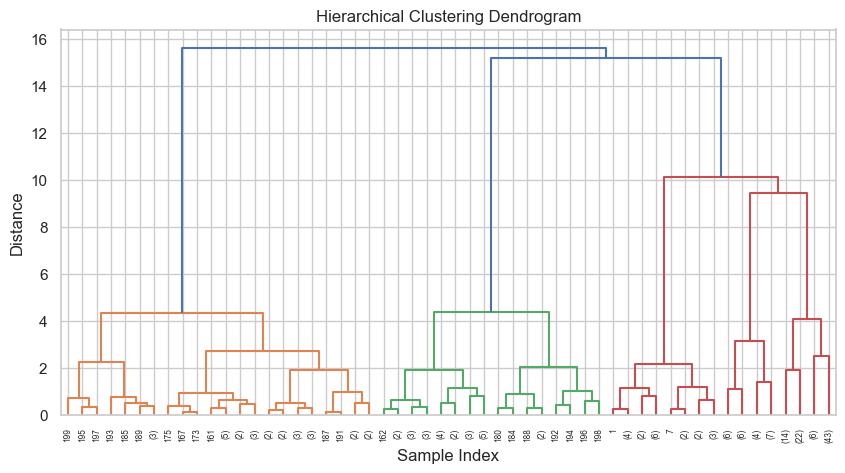

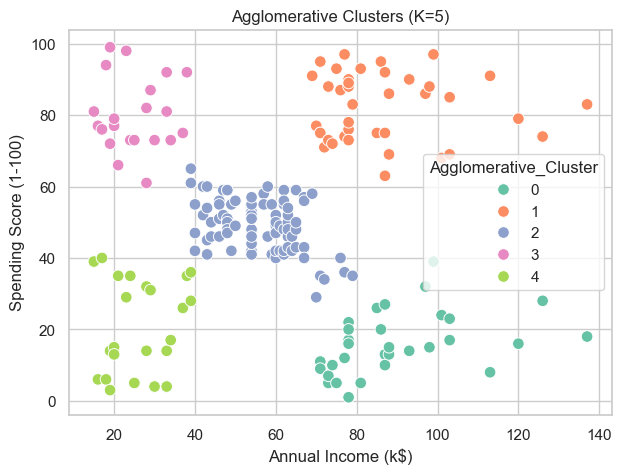

Agglomerative Silhouette Score: 0.5538089226688662
Agglomerative Davies-Bouldin Index: 0.5778621190740154


In [83]:
# --- B) Hierarchical Clustering (Agglomerative) ---
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Dendrogram (Ward linkage)
Z = linkage(X_scaled, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering with same number of clusters as KMeans best_k
agg = AgglomerativeClustering(n_clusters=best_k, linkage="ward")
agg_labels = agg.fit_predict(X_scaled)
df['Agglomerative_Cluster'] = agg_labels

plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Agglomerative_Cluster'], palette="Set2", s=70)
plt.title(f"Agglomerative Clusters (K={best_k})")
plt.show()

# Evaluation
print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, agg_labels))
print("Agglomerative Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agg_labels))

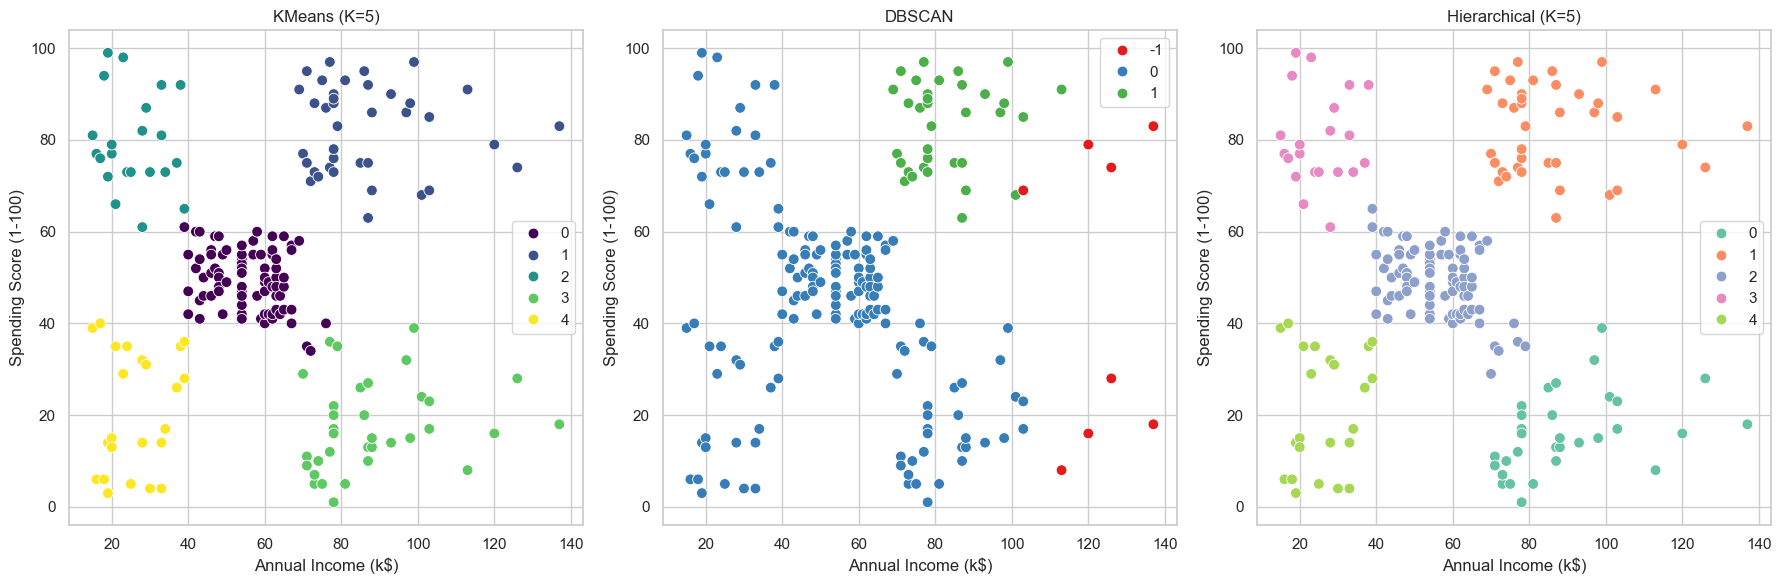

KMeans → Silhouette: 0.5546571631111091 | Davies-Bouldin: 0.5722356162263352
DBSCAN → Not enough valid clusters for metrics
Hierarchical → Silhouette: 0.5538089226688662 | Davies-Bouldin: 0.5778621190740154


In [84]:
# --------------------------------------
# Subplot Comparison: KMeans, DBSCAN, Hierarchical
# --------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Prepare scaled features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. KMeans with best_k from earlier (you can replace best_k if needed)
best_k = 5  # replace if you already computed optimal K
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=25)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 4. Hierarchical (Agglomerative)
agg = AgglomerativeClustering(n_clusters=best_k, linkage="ward")
agg_labels = agg.fit_predict(X_scaled)

# 5. Create Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# KMeans Plot
sns.scatterplot(ax=axes[0],
                x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=kmeans_labels, palette="viridis", s=60)
axes[0].set_title(f"KMeans (K={best_k})")

# DBSCAN Plot
sns.scatterplot(ax=axes[1],
                x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=dbscan_labels, palette="Set1", s=60)
axes[1].set_title("DBSCAN")

# Agglomerative Plot
sns.scatterplot(ax=axes[2],
                x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=agg_labels, palette="Set2", s=60)
axes[2].set_title(f"Hierarchical (K={best_k})")

plt.tight_layout()
plt.show()

# 6. Evaluation Metrics
print("KMeans → Silhouette:", silhouette_score(X_scaled, kmeans_labels),
      "| Davies-Bouldin:", davies_bouldin_score(X_scaled, kmeans_labels))

if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    print("DBSCAN → Silhouette:", silhouette_score(X_scaled, dbscan_labels),
          "| Davies-Bouldin:", davies_bouldin_score(X_scaled, dbscan_labels))
else:
    print("DBSCAN → Not enough valid clusters for metrics")

print("Hierarchical → Silhouette:", silhouette_score(X_scaled, agg_labels),
      "| Davies-Bouldin:", davies_bouldin_score(X_scaled, agg_labels))


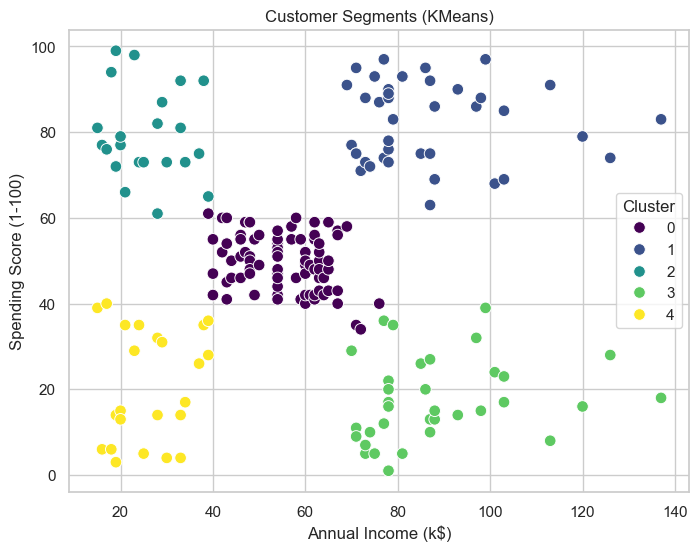

In [87]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['KMeans_Cluster'], palette="viridis", s=70)
plt.title("Customer Segments (KMeans)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


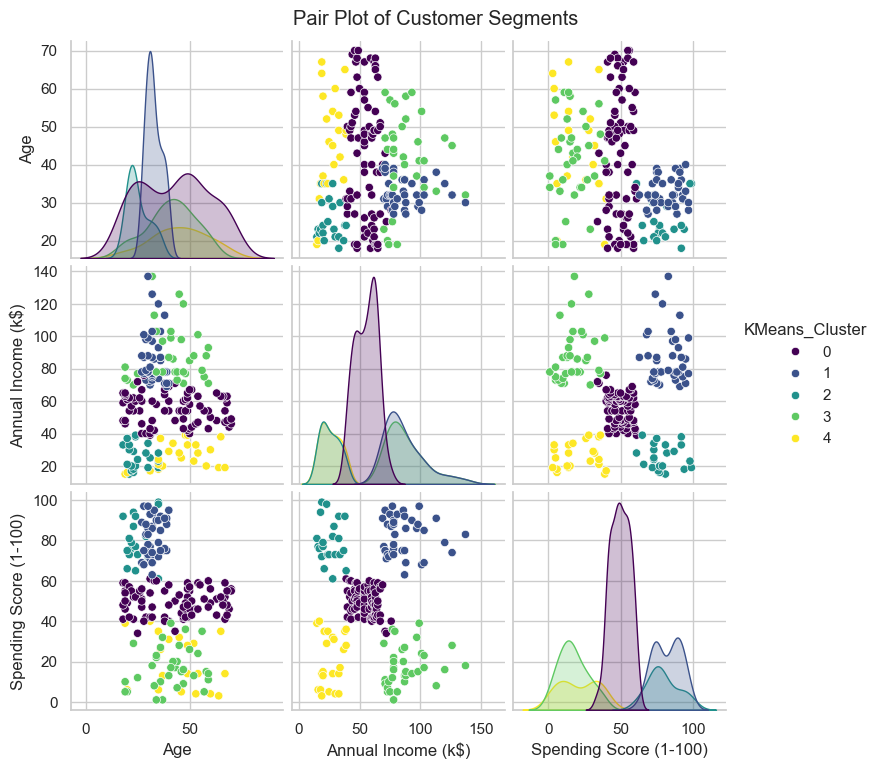

In [90]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)','KMeans_Cluster']],
             hue="KMeans_Cluster", palette="viridis")
plt.suptitle("Pair Plot of Customer Segments", y=1.02)
plt.show()
